# Regression
CMP5101 notes (Tevfik Aytekin)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics.scorer import make_scorer
%matplotlib inline

train = pd.read_csv("house-prices/train.csv")
test = pd.read_csv("house-prices/test.csv")

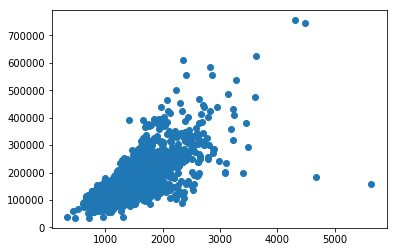

In [2]:
plt.scatter(train.loc[:,"GrLivArea"], train.loc[:,"SalePrice"])

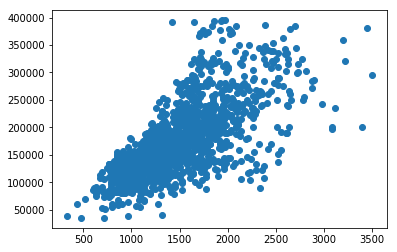

In [3]:
train2 = train[(train.GrLivArea < 4000) & (train.SalePrice < 400000)]
plt.scatter(train2.loc[:,"GrLivArea"], train2.loc[:,"SalePrice"])

(257, 1) (257,)
(29, 1) (29,)


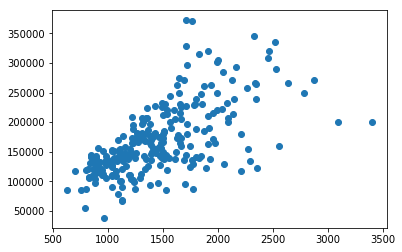

In [4]:
# Take a small sample of the data in order to work with nicer diagrams.
# Make a test / train split

train2 = train2.sample(frac=0.2)
X = train2[['GrLivArea']]
y = train2['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)
plt.scatter(X_train, y_train)

In [5]:
# fit a linear model
model = linear_model.LinearRegression()
model = model.fit(X_train, y_train)
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

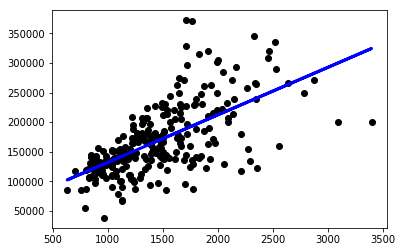

In [6]:
#Plot regression line on training data
plt.scatter(X_train, y_train,  color='black')
plt.plot(X_train, train_predictions, color='blue', linewidth=3)

In [7]:
# Show the intercept and the coefficient of the model (which is a line)
print (model.intercept_)
print (model.coef_)

51503.89488160334
[80.43528622]


#### Can we interpret the above coefficient as increase in price per square feet?

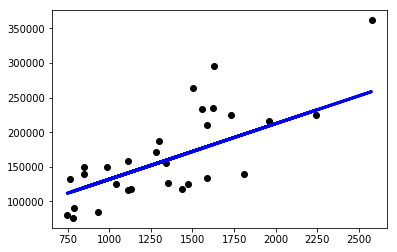

In [8]:
#Plot regression line on test data
plt.scatter(X_test, y_test,  color='black')
plt.plot(X_test, test_predictions, color='blue', linewidth=3)

In [9]:
# training and test set mean absolute error (MAE)
print("Training MAE:", mean_absolute_error(y_train, train_predictions))
# or
print(np.mean(np.abs(y_train - train_predictions)))

print("Test MAE:", mean_absolute_error(y_test, test_predictions))


Training MAE: 33649.77946650802
33649.77946650802
Test MAE: 37279.97821817972


In [10]:
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
print("Test MAPE:", mean_absolute_percentage_error(y_test, test_predictions))

Test MAPE: 23.486830568809943


In [11]:
print("r-squared:", model.score(X_test, y_test))

r-squared: 0.5332016481658604


## The Coefficient of Determination, r-squared ($r^2$)

$r^2$, is the percentage of the dependent variable variation that a model explains. What does this mean? Baseline model predicts always the mean value (a horizontal line). We can find the SSE of the baseline model (call it MSSE). Find the SSE of the regression line (call it RSSE). RSSE/MSSE compares the performance of the model with respect to baseline. If it is 1 it means the model performance is as bad as the baseline, if it is 0 it means that the model performance is perfect. $r^2$ is just 1 - RSSE/MSSE.

More information is [here](https://onlinecourses.science.psu.edu/stat501/node/255/)

$r$ in $r^2$ refers to Pearson's correlation coefficient. Relation between $r$ and $r_2$ is [here](http://www.win-vector.com/blog/2011/11/correlation-and-r-squared/)


In [12]:
# baseline - predict always the mean SalePrice value

mean_sales_price = y_train.mean()
mean_array = np.ones(y_test.size)*mean_sales_price
print("Baseline (mean) MAE:", mean_absolute_error(y_test, mean_array))
print("Baseline (mean) MAPE:", mean_absolute_percentage_error(y_test, mean_array))


Baseline (mean) MAE: 54710.3083322152
Baseline (mean) MAPE: 37.18775847881788


In [13]:
# Scores according to Kaggle challenge metric
def kaggle_score(y_true,y_pred):
    return np.sqrt(mean_squared_error(np.log(y_true), np.log(np.abs(y_pred))))

print("Test Kaggle-score:", kaggle_score(y_test, test_predictions))
print("Baseline (mean) Kaggle-score:", kaggle_score(y_test,mean_array))


Test Kaggle-score: 0.2587322447976686
Baseline (mean) Kaggle-score: 0.3949804984266709


In [14]:
# Prediction with two input variables

X = train.loc[:,['GrLivArea','BedroomAbvGr']]
y = train.loc[:,'SalePrice']

mae, kaggle, mape = [], [], []
for i in range(1,10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
    #X = X.fillna(X.mean()) #is this ok?
    X_train = X_train.fillna(X_train.mean())
    X_test = X_test.fillna(X_test.mean())

    lm = linear_model.LinearRegression()
    model = lm.fit(X_train, y_train)
    test_predictions = model.predict(X_test)
    mae.append(mean_absolute_error(y_test, test_predictions))
    kaggle.append(kaggle_score(y_test, test_predictions))
    mape.append(mean_absolute_percentage_error(y_test, test_predictions))

print("Test MAE:", np.mean(mae))
print("Test Kaggle-Score:", np.mean(kaggle))
print("Test MAPE:", np.mean(mape))
print ("Intercept:", model.intercept_)
combined = np.vstack((['GrLivArea','Bedroom'], model.coef_)).T
print(combined)

Test MAE: 36322.32363417357
Test Kaggle-Score: 0.2684681206651753
Test MAPE: 22.465877162892298
Intercept: 62156.56301831447
[['GrLivArea' '128.17209494605544']
 ['Bedroom' '-26254.335706493384']]


#### The coefficient of Bedroom is negative! Does increase in the number of bedrooms negatively effect house price?

In [15]:
# Prediction with only Bedroom

X = train.loc[:,['BedroomAbvGr']]
y = train.loc[:,'SalePrice']

mae, kaggle, mape = [], [], []
for i in range(1,10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
    X_train = X_train.fillna(X_train.mean())
    X_test = X_test.fillna(X_test.mean())

    lm = linear_model.LinearRegression()
    model = lm.fit(X_train, y_train)
    test_predictions = model.predict(X_test)
    mae.append(mean_absolute_error(y_test, test_predictions))
    kaggle.append(kaggle_score(y_test, test_predictions))
    mape.append(mean_absolute_percentage_error(y_test, test_predictions))

print("Test MAE:", np.mean(mae))
print("Test Kaggle-Score:", np.mean(kaggle))
print("Test MAPE:", np.mean(mape))
print ("Intercept:", model.intercept_)
combined = np.vstack((['Bedroom'], model.coef_)).T
print(combined)

Test MAE: 57013.5213957927
Test Kaggle-Score: 0.4012849816923003
Test MAPE: 35.99667141894319
Intercept: 136754.18985322272
[['Bedroom' '15727.520088528021']]


In [16]:
# Run linear regression with top correlated 10 attributes with SalePrice
cors = train.corr(); 
top10 = cors.loc[:, "SalePrice"].sort_values(ascending = False).head(11)
top10 = top10.index.values.tolist()
top10.pop(0)

X = train.loc[:,top10]
y = train.loc[:,'SalePrice']

mae, kaggle, mape = [], [], []
for i in range(1,10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
    X_train = X_train.fillna(X_train.mean())
    X_test = X_test.fillna(X_test.mean())

    lm = linear_model.LinearRegression()
    model = lm.fit(X_train, y_train)
    test_predictions = model.predict(X_test)
    mae.append(mean_absolute_error(y_test, test_predictions))
    kaggle.append(kaggle_score(y_test, test_predictions))
    mape.append(mean_absolute_percentage_error(y_test, test_predictions))

print("Test MAE:", np.mean(mae))
print("Test Kaggle-Score:", np.mean(kaggle))
print("Test MAPE:", np.mean(mape))
print ("Intercept:", model.intercept_)
combined = np.vstack((top10, model.coef_)).T
print(combined)


Test MAE: 25871.50611989246
Test Kaggle-Score: 0.1976968121824125
Test MAPE: 15.127298691658954
Intercept: -1253487.7873746057
[['OverallQual' '19885.911834786813']
 ['GrLivArea' '42.148014231757614']
 ['GarageCars' '11772.391518736164']
 ['GarageArea' '12.086248454371123']
 ['TotalBsmtSF' '16.789948758557856']
 ['1stFlrSF' '17.11021653345189']
 ['FullBath' '-6478.734792003699']
 ['TotRmsAbvGrd' '1295.9622722634665']
 ['YearBuilt' '267.7502690224494']
 ['YearRemodAdd' '331.7858916196516']]


In [19]:

# run linear regression with full data
X = train.loc[:,'MSSubClass':'SaleCondition']
y = train.loc[:,'SalePrice']
X = pd.get_dummies(X)
mae, kaggle, mape = [], [], []
for i in range(1,10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
    X_train = X_train.fillna(X_train.mean())
    X_test = X_test.fillna(X_test.mean())

    lm = linear_model.LinearRegression()
    model = lm.fit(X_train, y_train)
    test_predictions = model.predict(X_test)
    mae.append(mean_absolute_error(y_test, test_predictions))
    kaggle.append(kaggle_score(y_test, test_predictions))
    mape.append(mean_absolute_percentage_error(y_test, test_predictions))

print("Test MAE:", np.mean(mae))
print("Test Kaggle-Score:", np.mean(kaggle))
print("Test MAPE:", np.mean(mape))
print ("Intercept:", model.intercept_)
print(X.shape)

Test MAE: 23352.192931242178
Test Kaggle-Score: 0.20684433124938412
Test MAPE: 13.10309860575228
Intercept: 368309.7042436316
(1460, 288)


[Dummy encoding](http://www.statisticssolutions.com/dummy-coding-the-how-and-why/)

In [90]:
# Cross validation with a single line
X = X.fillna(X.mean()) #!!! Test data is used in the mean
result = cross_val_score(model, X, y, scoring="neg_mean_absolute_error", cv = 5)
print(result)


[-19046.63011546 -18850.54099706 -19965.80441316 -15996.68770613
 -20272.26396749]


### Scaling (or Standardization)

In [91]:
from sklearn.preprocessing import MinMaxScaler
X = train.loc[:,['LotArea','OverallQual']]
y = train.loc[:,'SalePrice']
X = pd.get_dummies(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
X_train = X_train.fillna(X_train.mean())
X_test = X_test.fillna(X_test.mean())

scaler = MinMaxScaler()
scaler = scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
# test set should be scaled with the scaler trained on the training set.
X_test_scaled = scaler.transform(X_test)

lm = linear_model.LinearRegression()
model = lm.fit(X_train_scaled, y_train)
test_predictions = model.predict(X_test_scaled)
print("Test MAE:", mean_absolute_error(y_test, test_predictions))
print("Test Kaggle-score:", kaggle_score(y_test, test_predictions))
print("Test MAPE:", mean_absolute_percentage_error(y_test, test_predictions))
print(X_train_scaled)

Test MAE: 30447.307070766397
Test Kaggle-score: 0.24135232712542343
Test MAPE: 19.356490294855817
[[0.05543013 0.66666667]
 [0.02252915 0.33333333]
 [0.04627357 0.44444444]
 ...
 [0.02477272 0.44444444]
 [0.02746033 0.55555556]
 [0.09642665 0.44444444]]


### Overfitting

(8, 1) (8,)
(1, 1) (1,)


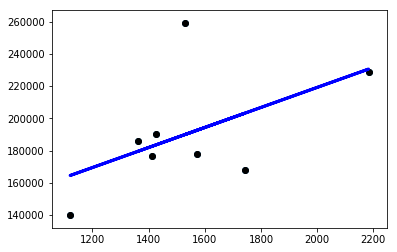

In [92]:
train3 = train2.sample(frac=0.03)
X = train3[['GrLivArea']]
y = train3['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)
plt.scatter(X_train, y_train)

model_slr = linear_model.LinearRegression()
model = model_slr.fit(X_train, y_train)
train_predictions = model_slr.predict(X_train)
test_predictions = model_slr.predict(X_test)

plt.scatter(X_train, y_train,  color='black')
plt.plot(X_train, train_predictions, color='blue', linewidth=3)

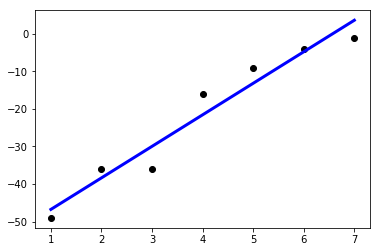

In [96]:
# Add poynomial features
X = np.array([7,6,5,4,3,2,1])
y = np.array([1,2,3,4,6,6,7])
y = -y**2
X = X.reshape(-1,1)

model = linear_model.LinearRegression()
model = model.fit(X, y)

train_predictions = model.predict(X)

plt.scatter(X, y,  color='black')
plt.plot(X, train_predictions, color='blue', linewidth=3)


[[ 7 49]
 [ 6 36]
 [ 5 25]
 [ 4 16]
 [ 3  9]
 [ 2  4]
 [ 1  1]]
[13.25       -0.60714286]
-62.4285714285714


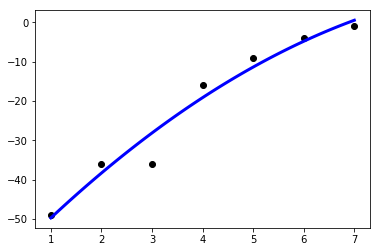

In [97]:
# Add poynomial features
X = np.array([7,6,5,4,3,2,1])
y = np.array([1,2,3,4,6,6,7])
y = -y**2
X = X.reshape(-1,1)
X = np.c_[X,X**2]
model = linear_model.LinearRegression()
model = model.fit(X, y)
X2 = np.linspace(1,7,100)
X2 = X2.reshape(-1,1)
X2 = np.c_[X2,X2**2]
train_predictions = model.predict(X2)

plt.scatter(X[:,0], y,  color='black')
plt.plot(X2[:,0], train_predictions, color='blue', linewidth=3)
print(X)
print(model.coef_)
print(model.intercept_)

[ 3.92548440e+00  7.13912845e+00  6.47138798e+00 -4.98518482e-01
 -6.85905697e+00  4.26587424e+00 -1.05595717e+00  1.19355760e-01
 -5.11404786e-03]
-62.50258416955434


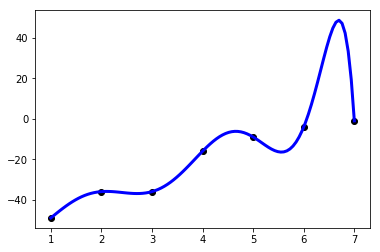

In [98]:
# Add poynomial features
X = np.array([7,6,5,4,3,2,1])
y = np.array([1,2,3,4,6,6,7])
y = -y**2
X = X.reshape(-1,1)
X = np.c_[X,X**2,X**3,X**4,X**5,X**6,X**7,X**8,X**9]
# Add more polynomial features and plot the result
model = linear_model.LinearRegression()
model = model.fit(X, y)

X2 = np.linspace(1,7,100)
X2 = X2.reshape(-1,1)
X2 = np.c_[X2,X2**2,X2**3,X2**4,X2**5,X2**6,X2**7,X2**8,X2**9]
train_predictions = model.predict(X2)

plt.scatter(X[:,0], y,  color='black')
plt.plot(X2[:,0], train_predictions, color='blue', linewidth=3)
print(model.coef_)
print(model.intercept_)

### Ridge Regression

[ 0.02305921  0.05015315  0.07058339  0.06780165  0.04067458  0.02474551
 -0.01855496  0.0032404  -0.00017692]
-45.4095953507955


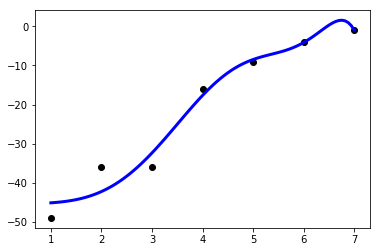

In [101]:
from sklearn.linear_model import Ridge
X = np.array([7,6,5,4,3,2,1])
y = np.array([1,2,3,4,6,6,7])
y = -y**2
X = X.reshape(-1,1)
X = np.c_[X,X**2,X**3,X**4,X**5,X**6,X**7,X**8,X**9]
# Add more polynomial features and plot the result
model = linear_model.Ridge(alpha=5)
# play with the value of alpha and see its effect.
model = model.fit(X, y)

X2 = np.linspace(1,7,100)
X2 = X2.reshape(-1,1)
X2 = np.c_[X2,X2**2,X2**3,X2**4,X2**5,X2**6,X2**7,X2**8,X2**9]
train_predictions = model.predict(X2)

plt.scatter(X[:,0], y,  color='black')
plt.plot(X2[:,0], train_predictions, color='blue', linewidth=3)
print(model.coef_)
print(model.intercept_)

### PolynomialFeatures method in Python

In [107]:
from sklearn.preprocessing import PolynomialFeatures
X = train.loc[:,['GrLivArea','BedroomAbvGr']]
y = train.loc[:,'SalePrice']
X = X.fillna(X.mean())
poly = PolynomialFeatures(degree=2, include_bias=False)
X = poly.fit_transform(X)
mae, kaggle, mape = [], [], []
for i in range(1,10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
    #X = X.fillna(X.mean()) #is this ok?
    #X_train = X_train.fillna(X_train.mean())
    #X_test = X_test.fillna(X_test.mean())

    lm = linear_model.LinearRegression()
    model = lm.fit(X_train, y_train)
    test_predictions = model.predict(X_test)
    mae.append(mean_absolute_error(y_test, test_predictions))
    kaggle.append(kaggle_score(y_test, test_predictions))
    mape.append(mean_absolute_percentage_error(y_test, test_predictions))

print("Test MAE:", np.mean(mae))
print("Test Kaggle-Score:", np.mean(kaggle))
print("Test MAPE:", np.mean(mape))
print ("Intercept:", model.intercept_)
print(X)

Test MAE: nan
Test Kaggle-Score: nan
Test MAPE: nan
Intercept: -13466.727121512522


/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2957: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


(1460, 41904)